# Assignment 2: Iterative-Deepening Search

Lucas Wilson

# Code Functions

In [1]:
def depthLimitedSearch(state, goalState, actionsF, takeActionF,
        depthLimit):
    """ Explained below """
    
    """ base cases """
    if state == goalState:
        return []
    if depthLimit == 0:
        return 'cutoff'
    
    """ exploration """
    cutoffOccurred = False
    for action in actionsF(state):
        """ explore each child node """
        childState = takeActionF(state, action)
        result = depthLimitedSearch(childState, goalState, actionsF,
                takeActionF, depthLimit-1)
        
        """ handle post exploration """
        if result == 'cutoff': # depth limit reached
            cutoffOccurred = True
        elif result != 'failure':
            return [childState] + result
    
    """ full tree traversal """
    if cutoffOccurred:
        return 'cutoff'
    else:
        return 'failure'

In [2]:
def iterativeDeepeningSearch(startState, goalState, actionsF, takeActionF,
        maxDepth):
    """ Explained below """
    
    for depth in range(maxDepth):
        results = depthLimitedSearch(startState, goalState, actionsF,
                takeActionF, depth)
        if results == 'failure':
            return 'failure'
        elif results != 'cutoff':
            return [startState] + results
    return 'cutoff'

In [3]:
def findBlank_8p(state):
    """return the row and column index for the location of the
    blank (the 0 value)
    """
    index = state.index(0)
    return index//3, index%3

In [4]:
def actionsF_8p(state):
    """returns a list of up to four valid actions that can be
    applied in state. Return them in the order left, right, up, 
    down, though only if each one is a valid action.
    """
    ret_value = []
    r, c = findBlank_8p(state)
    if c != 0:
        ret_value.append("left")
    if c != 2:
        ret_value.append("right")
    if r != 0:
        ret_value.append("up")
    if r != 2:
        ret_value.append("down")
    return ret_value

In [5]:
def takeActionF_8p(state, action):
    """Return the state that results from applying action in state."""
    newState = state.copy()
    r, c = findBlank_8p(newState)
    zero_index = r*3 + c
    swap_index = zero_index
    if action == "left":
        swap_index -= 1
    elif action == "right":
        swap_index += 1
    elif action == "up":
        swap_index -= 3
    elif action == "down":
        swap_index += 3
    newState[zero_index] = newState[swap_index]
    newState[swap_index] = 0
    return newState

In [6]:
def printState_8p(state):
    pState = '{} {} {}\n{} {} {}\n{} {} {}'.format(*state).replace('0', '-')
    print(pState)

In [7]:
def printPath_8p(startState, goalState, path):
    """Print a solution path in a readable form. startState can be
    included in path, it is only printed once"""
    print("Path from")
    print()
    printState_8p(startState)
    print()
    print("to")
    print()
    printState_8p(goalState)
    print()
    if path == 'cutoff':
        print("couldn't be found (cutoff)")
        return
    elif path == 'failure':
        print("doesn't exist (failure)")
        return
    print("takes {} actions.".format(len(path)))
    print()
    print("~~~ path ~~~")
    print()
    printState_8p(startState)
    if path and startState == path[0]:
        newPath = path[1:]
    else:
        newPath = path
    for state in newPath:
        print()
        printState_8p(state)

## The 8-puzzle functions

States look like this:

In [8]:
startState = [0, 1, 2, 3, 4, 5, 6, 7, 8]
printState_8p(startState)

- 1 2
3 4 5
6 7 8


The blank tile is at these coordinates:

In [9]:
findBlank_8p(startState)

(0, 0)

Actions look like this:

In [10]:
actionsF = actionsF_8p(startState)
actionsF

['right', 'down']

Moving 'right' looks like this:

In [11]:
printState_8p(takeActionF_8p(startState, 'right'))

1 - 2
3 4 5
6 7 8


Solution paths look like this:

In [12]:
goalState = startState
goalState = takeActionF_8p(goalState, 'right')
goalState = takeActionF_8p(goalState, 'right')
goalState = takeActionF_8p(goalState, 'down')
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 5)
printPath_8p(startState, goalState, path)

Path from

- 1 2
3 4 5
6 7 8

to

1 2 5
3 4 -
6 7 8

takes 4 actions.

~~~ path ~~~

- 1 2
3 4 5
6 7 8

1 - 2
3 4 5
6 7 8

1 2 -
3 4 5
6 7 8

1 2 5
3 4 -
6 7 8


## `depthLimitedSearch`

A depth-first search explores the descendants of the child nodes as they are discovered. Siblings of the initial child node are explored after every child node of the initial child node has been explored. Recursively, this is true of every set of siblings in a depth-first search.

This can have some issues:
* Cycles: it will follow cycles if not detected
* Incomplete: if it doesn't detect cycles, then it could never find a solution
* Non-optimal: it may find a deep solution before a shorter solution, thus it is not optimal

However, it does also have a benefit:
* Memory efficient: it can remove explored subtrees from memory

A depth-limited search is a depth-first search with a depth limit, meaning at a certain depth, it stops traversing.
* Solves cycles: if a cycle exists, it will follow the cycle a limited number of times. Notably, it isn't capable of detecting the cycle, but it doesn't get trapped in infinite loops, so it doesn't need to. It can therefore search graphs with cycles.
* Doesn't solve completeness: Despite being able to handle cycles allowing it to traverse completely, it can't search the space below the depth limit. Therefore, it is incomplete. (Although if the max depth could be known, then it could be complete and not affected by cycles. In that case, it would be complete.)
* Doesn't solve optimality: it's still depth-first.
* Preserves memory efficiency: in fact, cycles can now be considered subtrees and be dropped from memory when the depth limit is reached.

## `depthLimitedSearch` Function

A depth-first search explores the descendants of the child nodes as they are discovered. Siblings of the initial child node are explored after every child node of the initial child node has been explored. Recursively, this is true of every set of siblings in a depth-first search.

This can have some issues:
* Cycles: it will follow cycles if not detected
* Incomplete: if it doesn't detect cycles, then it could never find a solution
* Non-optimal: it may find a deep solution before a shorter solution, thus it is not optimal

However, it does also have a benefit:
* Memory efficient: it can remove explored subtrees from memory

A depth-limited search is a depth-first search with a depth limit, meaning at a certain depth, it stops traversing.
* Solves cycles: if a cycle exists, it will follow the cycle a limited number of times. Notably, it isn't capable of detecting the cycle, but it doesn't get trapped in infinite loops, so it doesn't need to. It can therefore search graphs with cycles.
* Doesn't solve completeness: Despite being able to handle cycles allowing it to traverse completely, it can't search the space below the depth limit. Therefore, it is incomplete. (Although if the max depth could be known, then it could be complete and not affected by cycles. In that case, it would be complete.)
* Doesn't solve optimality: it's still depth-first.
* Preserves memory efficiency: in fact, cycles can now be considered subtrees and be dropped from memory when the depth limit is reached.

This function performs a depth-limited search on a route-finding problem defined the following: the current state, `state`; a goal state, `goalState`; a depth limit, `depthLimit`; an actions function, `actionsF`; and the successors function, `takeActionF`. From a graph perspective, `startState` is the initial state node. Any children are defined by `takeActionF` and `actionsF` (and the function allows for cycles). `goalState` is the node we are searching for.

### Handles Cycles
Despite being able to move back and forth (i.e., a cycle), the function returns:

In [13]:
startState = list(range(9))
goalState = startState.copy()
goalState.reverse() # very difficult, if not impossible, goal state
path = depthLimitedSearch(startState, goalState, actionsF_8p, takeActionF_8p, 5)
printPath_8p(startState, goalState, path)

Path from

- 1 2
3 4 5
6 7 8

to

8 7 6
5 4 3
2 1 -

couldn't be found (cutoff)


### Non-Optimal
The goal state is created with a single move yet the solution finds a worse solution with 5 moves.

In [14]:
startState = list(range(9))
goalState = takeActionF_8p(startState, 'down') # single move
path = depthLimitedSearch(startState, goalState, actionsF_8p, takeActionF_8p, 5)
printPath_8p(startState, goalState, path)

Path from

- 1 2
3 4 5
6 7 8

to

3 1 2
- 4 5
6 7 8

takes 5 actions.

~~~ path ~~~

- 1 2
3 4 5
6 7 8

1 - 2
3 4 5
6 7 8

- 1 2
3 4 5
6 7 8

1 - 2
3 4 5
6 7 8

- 1 2
3 4 5
6 7 8

3 1 2
- 4 5
6 7 8


Interestingly, if we change the depth to 1, it is forced to find the optimal solution.

In [15]:
startState = list(range(9))
goalState = takeActionF_8p(startState, 'down') # single move
path = depthLimitedSearch(startState, goalState, actionsF_8p, takeActionF_8p, 1)
printPath_8p(startState, goalState, path)

Path from

- 1 2
3 4 5
6 7 8

to

3 1 2
- 4 5
6 7 8

takes 1 actions.

~~~ path ~~~

- 1 2
3 4 5
6 7 8

3 1 2
- 4 5
6 7 8


### Incomplete
Notice how the goal state was created with 4 moves, but the depth limit is 3 moves, so the solution can't be found.

In [16]:
startState = list(range(9))
goalState = takeActionF_8p(startState, 'right')
goalState = takeActionF_8p(goalState, 'right')
goalState = takeActionF_8p(goalState, 'down')
goalState = takeActionF_8p(goalState, 'down')
path = depthLimitedSearch(startState, goalState, actionsF_8p, takeActionF_8p, 3)
printPath_8p(startState, goalState, path)

Path from

- 1 2
3 4 5
6 7 8

to

1 2 5
3 4 8
6 7 -

couldn't be found (cutoff)


### The Algorithm
When `depthLimitedSearch` is initially called, it will usually fail the `base cases` section (see below). It will enter the `exploration` section and compute potential actions using `actionsF`. For every state generated by `takeActionF` on each action, the process is repeated.

Eventually, the base cases are reached: the solution, leaf node or depth limit is found. If the depth limit is found, it returns 'cutoff'. If a leaf node is found, `cutoffOccurred` remains false and it returns 'failure'. If the solution is found, it returns a list signaling that `state` is the solution.

Every return value of a node's children nodes are evaluated. If the solution is found, it is immediately returned triggering all calling methods to do the same. The solution path is built as each recursion layer returns. If the solution is not found, then the for loop actually finishes. If any cutoffs occur, `cutoffOccurred` is set to true. This case implies that a child had more children which couldn't be explored due to the depth limit. In this case, the failure is reported as a `cutoff`. If no cutoffs occur, then every child node was discovered and explored, yet no solution was found, so it therefore reports as a `failure`.

If we build a simple tree for it to search, we can see this difference:
A -> B -> C -> D

In [17]:
startState = 'A'
goalState = 'NonExistent'
treeDict = {'A': 'B', 'B': 'C', 'C': 'D'}
def actionsF_tree(state):
    return [treeDict[state]] if state in treeDict else []
def takeActionF_tree(state, action):
    return treeDict[state]

With only 3 actions, it can reach `D`, but since the depth limit is reached, it can't explore `D`. It instead returns `cutoff`.

In [18]:
depthLimitedSearch(startState, goalState, actionsF_tree, takeActionF_tree, 3)

'cutoff'

Increasing the depth limit to 4 results in `D` being explored, and the algorithm discovering that it has no children; thus, `failure`.

In [19]:
depthLimitedSearch(startState, goalState, actionsF_tree, takeActionF_tree, 4)

'failure'

## `iterativeDeepeningSearch`  Function

An iterative depth-limited search is a depth-limited search but with incrementally deeper depth limits. It inherits the benefits of depth-limited search with some added benefits.
* Solves optimality: it searches completely the shallowest layers before searching deeper. The first solution it finds will therefore be the shallowest, and thus the optimal solution.
* Preserves incompleteness: same as before, the solution could be below the max depth. 

This function performs an iterative depth-limited search on the same problem defined as before (`depthLimit` replaced by `maxDepth`; `state` replaced by `startState`).

If the result of `depthLimitedSearch` is `failure`, then the graph has been fully searched but no solution has been found. Thus, increasing the depth will have no effect, and `iterativeDeepeningSearch` can instead stop and report the `failure`.

If the result is `cutoff`, then some child had more unexplored nodes. Increasing the depth limit will prompt those unexplored nodes to be explored, so in the algorithm, this is done.

Of course, if the solution is found, then we stop the iterations and return it.

### Optimality

The algorithm finds the 2 move solution (from earlier) despite having a max depth of 100.  It's worth noting that it didn't try a depth of 100; you can tell by how fast it ran. It found the solution at a depth of 2 and stopped searching.

In [20]:
startState = list(range(9))
goalState = takeActionF_8p(startState, 'down') # single move
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 100)
printPath_8p(startState, goalState, path)

Path from

- 1 2
3 4 5
6 7 8

to

3 1 2
- 4 5
6 7 8

takes 2 actions.

~~~ path ~~~

- 1 2
3 4 5
6 7 8

3 1 2
- 4 5
6 7 8


### Still Incomplete

If the solution is too deep within the graph, it won't be found despite existing.

In [21]:
startState = list(range(9))
goalState = takeActionF_8p(startState, 'right')
goalState = takeActionF_8p(goalState, 'right')
goalState = takeActionF_8p(goalState, 'down')
goalState = takeActionF_8p(goalState, 'down')
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 3)
printPath_8p(startState, goalState, path)

Path from

- 1 2
3 4 5
6 7 8

to

1 2 5
3 4 8
6 7 -

couldn't be found (cutoff)


# 8-Puzzle Example

In [22]:
import random
def randomStartState(goalState, actionsF, takeActionF, nSteps):
    state = goalState
    for i in range(nSteps):
        state = takeActionF(state, random.choice(actionsF(state)))
    return state

In [23]:
goalState = list(range(9))
startState = randomStartState(goalState, actionsF_8p, takeActionF_8p, 50)
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 50)
printPath_8p(startState, goalState, path)

Path from

4 3 2
1 - 5
6 7 8

to

- 1 2
3 4 5
6 7 8

takes 7 actions.

~~~ path ~~~

4 3 2
1 - 5
6 7 8

4 3 2
- 1 5
6 7 8

- 3 2
4 1 5
6 7 8

3 - 2
4 1 5
6 7 8

3 1 2
4 - 5
6 7 8

3 1 2
- 4 5
6 7 8

- 1 2
3 4 5
6 7 8


The puzzle was shuffled using 50 random moves. Due to cycles, some of these moves returned it to a previous state. Then, when the algorithm searched for the solution, it collapsed these cycles resulting in the solution being fewer than 50 moves. However, if max depth is too small, then the solution may not be found. The smallest it should be to ensure completeness is 50.

# Second Example: Hanoi of Size 4

This Hanoi class is for handling state. The function declarations which use this class as a wrapper are defined below.

In [24]:
import copy
class Hanoi():
    def __init__(self):
        self.left = [4, 3, 2, 1]
        self.middle = []
        self.right = []
    
    def getSolved():
        solved = Hanoi()
        solved.right = solved.left
        solved.left = []
        return solved
    
    def getActions(self):
        left = self.left
        middle = self.middle
        right = self.right
        ret = []
        if left:
            if not middle or left[-1] < middle[-1]:
                ret.append('lm')
            if not right or left[-1] < right[-1]:
                ret.append('lr')
        if middle:
            if not left or middle[-1] < left[-1]:
                ret.append('ml')
            if not right or middle[-1] < right[-1]:
                ret.append('mr')
        if right:
            if not left or right[-1] < left[-1]:
                ret.append('rl')
            if not middle or right[-1] < middle[-1]:
                ret.append('rm')
        return ret
    
    def doAction(self, action):
        copySelf = Hanoi()
        copySelf.left = self.left.copy()
        copySelf.middle = self.middle.copy()
        copySelf.right = self.right.copy()
        if action[0] == 'l':
            fromBar = copySelf.left
        elif action[0] == 'm':
            fromBar = copySelf.middle
        elif action[0] == 'r':
            fromBar = copySelf.right
        
        if action[1] == 'l':
            toBar = copySelf.left
        elif action[1] == 'm':
            toBar = copySelf.middle
        elif action[1] == 'r':
            toBar = copySelf.right
        
        toBar.append(fromBar.pop())
        return copySelf
    
    def __str__(self):
        maxLen = max(len(self.left), len(self.middle))
        maxLen = max(maxLen, len(self.right))
        # Sorry it's side ways :)
        ret = str(self.left) + '\n'
        ret += str(self.middle) + '\n'
        ret += str(self.right)
        return ret
    
    def __eq__(self, other):
        if not isinstance(other, Hanoi):
            return False
        return self.left == other.left and self.middle == other.middle and self.right == other.right

In [25]:
def actionsF_2nd(state):
    return state.getActions()

In [26]:
def takeActionF_2nd(state, action):
    return state.doAction(action)

In [27]:
def printPath_2nd(startState, goalState, path):
    print("Solution from\n\n{}\n\nto\n\n{}\n".format(startState, goalState))
    if isinstance(path, list):
        if path and startState != path[0]:
            path = [startState] + path
        if path and goalState != path[-1]:
            path = path + [goalState]
        print('taking {} moves is\n'.format(len(path)-1))
        for state in path:
            print(state)
            print()
    else:
        print('No solution found')
        return

In [28]:
startState = Hanoi()
goalState = Hanoi.getSolved()
path = iterativeDeepeningSearch(startState, goalState, actionsF_2nd, takeActionF_2nd, 20)
printPath_2nd(startState, goalState, path)

Solution from

[4, 3, 2, 1]
[]
[]

to

[]
[]
[4, 3, 2, 1]

taking 15 moves is

[4, 3, 2, 1]
[]
[]

[4, 3, 2]
[1]
[]

[4, 3]
[1]
[2]

[4, 3]
[]
[2, 1]

[4]
[3]
[2, 1]

[4, 1]
[3]
[2]

[4, 1]
[3, 2]
[]

[4]
[3, 2, 1]
[]

[]
[3, 2, 1]
[4]

[]
[3, 2]
[4, 1]

[2]
[3]
[4, 1]

[2, 1]
[3]
[4]

[2, 1]
[]
[4, 3]

[2]
[1]
[4, 3]

[]
[1]
[4, 3, 2]

[]
[]
[4, 3, 2, 1]



Interestingly, the number of moves to solve Hanoi is $2^n - 1$, so given this information, we know that max depth must be $2^n-1$. Also, we can just use `depthLimitedSearch` and specify the depth for $n=4 \implies depthLimit = 2^4-1=15$.

In [29]:
path = depthLimitedSearch(startState, goalState, actionsF_2nd, takeActionF_2nd, 15)
printPath_2nd(startState, goalState, path)

Solution from

[4, 3, 2, 1]
[]
[]

to

[]
[]
[4, 3, 2, 1]

taking 15 moves is

[4, 3, 2, 1]
[]
[]

[4, 3, 2]
[1]
[]

[4, 3]
[1]
[2]

[4, 3]
[]
[2, 1]

[4]
[3]
[2, 1]

[4, 1]
[3]
[2]

[4, 1]
[3, 2]
[]

[4]
[3, 2, 1]
[]

[]
[3, 2, 1]
[4]

[]
[3, 2]
[4, 1]

[2]
[3]
[4, 1]

[2, 1]
[3]
[4]

[2, 1]
[]
[4, 3]

[2]
[1]
[4, 3]

[]
[1]
[4, 3, 2]

[]
[]
[4, 3, 2, 1]



# Results from A2grader

In [30]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Wilson-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Searching this graph:
 {'a': ['b', 'z', 'd'], 'b': ['a'], 'e': ['z'], 'd': ['y'], 'y': ['z']}

Looking for path from a to y with max depth of 1.
 5/ 5 points. Your search correctly returned cutoff

Looking for path from a to z with max depth of 5.
10/10 points. Your search correctly returned ['a', 'z']

Testing findBlank_8p([1, 2, 3, 4, 5, 6, 7, 0, 8])
 5/ 5 points. Your findBlank_8p correctly returned 2 1

Testing actionsF_8p([1, 2, 3, 4, 5, 6, 7, 0, 8])
10/10 points. Your actionsF_8p correctly returned ['left', 'right', 'up']

Testing takeActionF_8p([1, 2, 3, 4, 5, 6, 7, 0, 8],up)
10/10 points. Your takeActionsF_8p correctly returned [1, 2, 3, 4, 0, 6, 7, 5, 8]

Testing iterativeDeepeningSearch([1, 2, 3, 4, 5, 6, 7, 0, 8],[0, 2, 3, 1, 4,  6, 7, 5, 

# Extra Credit

For extra credit, apply your solution to the grid example in Assignment 1 with the addition of a horizontal and vertical barrier at least three positions long.  Demonstrate the solutions found in four different pairs of start and goal states.

The following cell of class definitions isn't that important. It's just a backend for the state: I define functions below that serve as wrappers for them.

## Class Backend (Skip)

In [31]:
import copy
import matplotlib.pyplot as plt
%matplotlib inline

class Wall():
    UP = "up"
    DOWN = "down"
    LEFT = "left"
    RIGHT = "right"

    def __init__(self, x, y, direction, length):
        """
        x and y are integers specifying the bottom left corner of the
        block you are trying to select
        """
        self.xStart = x + .5
        self.xEnd = self.xStart
        self.yStart = y + .5
        self.yEnd = self.yStart
        self.direction = direction
        if direction == Wall.DOWN:
            self.yStart -= length
        elif direction == Wall.UP:
            self.yEnd += length
        elif direction == Wall.LEFT:
            self.xStart -= length
        elif direction == Wall.RIGHT:
            self.xEnd += length
            
    def __str__(self):
        return "({}, {}) to ({}, {})".format(self.xStart, self.yStart, self.xEnd, self.yEnd)

class GridState():
    def __init__(self, x=0, y=0, n=20, walls=None):
        """walls is a list of wall objects"""
        self.x = x
        self.y = y
        self.n = n
        if walls:
            self.walls = walls
        else:
            self.walls = []
        self.addWall(-1, -1, Wall.UP, n+1)
        self.addWall(-1, n, Wall.RIGHT, n+1)
        self.addWall(n, -1, Wall.UP, n+1)
        self.addWall(-1, -1, Wall.RIGHT, n+1)
    
    def draw(startState, goalState, path):
        """Print a solution path in a readable form. startState can be
        included in path, it is only printed once"""
        n = startState.n
        if isinstance(path, list):
            if path and startState != path[0]:
                path = [startState] + path
            if path and goalState != path[-1]:
                path = path + [goalState]
            print("Solution path: from ({}, {}) to ({}, {}) taking {} moves ".format(
                    startState.x, startState.y, goalState.x, goalState.y, len(path)))
            for pt in path:
                print(pt)
                
        else:
            print("Path not found")
            path = [startState]

        plt.figure()
        #walls
        if startState.walls:
            for wall in startState.walls:
                plt.plot([wall.xStart, wall.xEnd],
                         [wall.yStart, wall.yEnd], 'k-')
            
        #path
        rows = [pt.x for pt in path]
        cols = [pt.y for pt in path]
        plt.xlim(-1, n+1)
        plt.ylim(-1, n+1)
        plt.plot(rows, cols, 'ro-')

    def doAction(self, action):
        retState = copy.copy(self)
        if action == "left": retState.x -= 1
        elif action == "right": retState.x += 1
        elif action == "up": retState.y += 1
        elif action == "down": retState.y -= 1
        return retState
    
    def canMoveV(self, bCoord):
        for wall in self.walls:
            movesUpOrDown = wall.direction == Wall.UP or wall.direction == Wall.DOWN
            hitsWall = bCoord < wall.yStart < bCoord + 1 and wall.xStart < self.x < wall.xEnd
            if not movesUpOrDown and hitsWall:
                return False
        return True
    
    def canMoveH(self, lCoord):
        for wall in self.walls:        
            movesLeftOrRight = wall.direction == Wall.LEFT or wall.direction == Wall.RIGHT
            hitsWall = lCoord < wall.xStart < lCoord + 1 and wall.yStart < self.y < wall.yEnd
            if not movesLeftOrRight and hitsWall:
                return False
        return True
        
    def getActions(self):
        ret_value = []
        if self.canMoveH(self.x-1):
            ret_value.append("left")
        if self.canMoveH(self.x):
            ret_value.append("right")
        if self.canMoveV(self.y):
            ret_value.append("up")
        if self.canMoveV(self.y-1):
            ret_value.append("down")
        return ret_value
    
    def addWall(self, x, y, direction, length):
        self.walls.append(Wall(x, y, direction, length))
        
    def __eq__(self, other):
        return isinstance(other, GridState) and \
            self.x == other.x and \
            self.y == other.y 
    
    def __ne__(self, other):
        return not self.__eq__(other)
    
    def __str__(self):
        return "({}, {})".format(self.x, self.y)

## Function Declarations (Don't Skip)

In [32]:
def actionsF_grid(state):
    return state.getActions()

In [33]:
def takeActionF_grid(state, action):
    return state.doAction(action)

In [34]:
def draw(startState, goalState, path):
    GridState.draw(startState, goalState, path)

## Base Example

In [35]:
goalState = GridState(5, 5, 5)
startState = GridState(5, 0, 5)

We take the initial position in the bottom right and target the top left. 

As expected, iterativeDeepingSearch finds the optimal solution.

Solution path: from (5, 0) to (5, 5) taking 6 moves 
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)


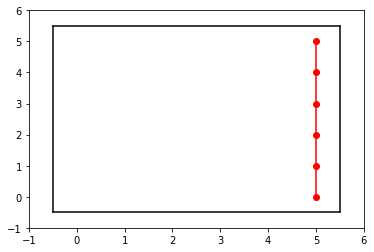

In [36]:
path = iterativeDeepeningSearch(startState, goalState, actionsF_grid, takeActionF_grid, 15)
draw(startState, goalState, path)

As expected, `depthLimitedSearch` with too large of a depth limit yields poor results. It spends all 15 moves moving left, moving right, and eventually moving all the way right and up.

Solution path: from (5, 0) to (5, 5) taking 16 moves 
(5, 0)
(4, 0)
(3, 0)
(2, 0)
(1, 0)
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)


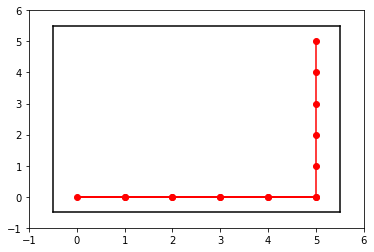

In [37]:
path = depthLimitedSearch(startState, goalState, actionsF_grid, takeActionF_grid, 15)
draw(startState, goalState, path)

## Walls

First, we'll build the map. Again, the goal will be the top right corner (8, 8).

Path not found


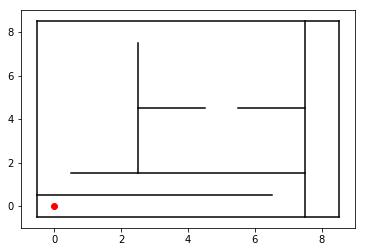

In [38]:
n = 8
startState = GridState(0, 0, n=n)
startState.addWall(-1, 0, Wall.RIGHT, 7)
startState.addWall(7, -1, Wall.UP, 9)
startState.addWall(7, 1, Wall.LEFT, 7)
startState.addWall(2, 1, Wall.UP, 6)
startState.addWall(2, 4, Wall.RIGHT, 2)
startState.addWall(7, 4, Wall.LEFT, 2)
goalState = GridState(n, n, n=n)
draw(startState, None, None)

### Around the Bend (0, 0) to (0, 1) 

Solution path: from (0, 0) to (0, 1) taking 16 moves 
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(7, 1)
(6, 1)
(5, 1)
(4, 1)
(3, 1)
(2, 1)
(1, 1)
(0, 1)
Solution path: from (0, 0) to (0, 1) taking 20 moves 
(0, 0)
(1, 0)
(0, 0)
(1, 0)
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(7, 1)
(6, 1)
(5, 1)
(4, 1)
(3, 1)
(2, 1)
(1, 1)
(0, 1)


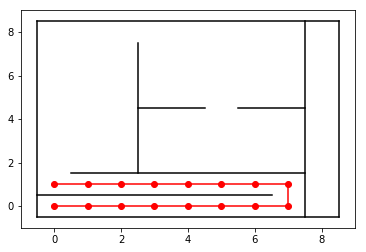

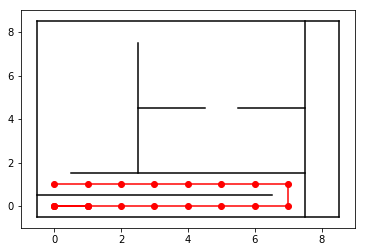

In [39]:
startState.x = 0
startState.y = 0
goalState.x = 0
goalState.y = 1
path = iterativeDeepeningSearch(startState, goalState, actionsF_grid, takeActionF_grid, 20)
draw(startState, goalState, path)
path = depthLimitedSearch(startState, goalState, actionsF_grid, takeActionF_grid, 20)
draw(startState, goalState, path)

### No Solution (7, 0) to (8, 0)

Path not found
Path not found


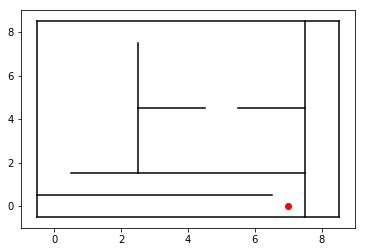

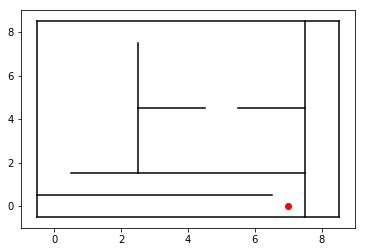

In [40]:
startState.x = 7
startState.y = 0
goalState.x = 8
goalState.y = 0
path = iterativeDeepeningSearch(startState, goalState, actionsF_grid, takeActionF_grid, 20)
draw(startState, goalState, path)
path = depthLimitedSearch(startState, goalState, actionsF_grid, takeActionF_grid, 20)
draw(startState, goalState, path)

### Around Two Walls (2, 2) to (3, 2)

Solution path: from (2, 2) to (5, 4) taking 14 moves 
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(5, 7)
(5, 6)
(5, 5)
(5, 4)
Solution path: from (2, 2) to (5, 4) taking 20 moves 
(2, 2)
(1, 2)
(0, 2)
(1, 2)
(0, 2)
(1, 2)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(5, 7)
(5, 6)
(5, 5)
(5, 4)


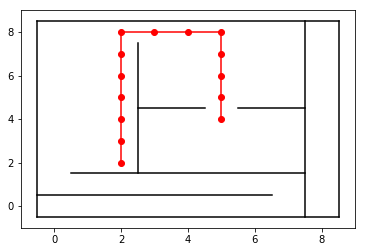

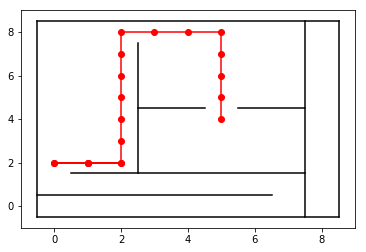

In [41]:
startState.x = 2
startState.y = 2
goalState.x = 5
goalState.y = 4
path = iterativeDeepeningSearch(startState, goalState, actionsF_grid, takeActionF_grid, 20)
draw(startState, goalState, path)
path = depthLimitedSearch(startState, goalState, actionsF_grid, takeActionF_grid, 20)
draw(startState, goalState, path)

### In the Open (0, 2) to (2, 8)

Solution path: from (0, 2) to (2, 8) taking 9 moves 
(0, 2)
(1, 2)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
Solution path: from (0, 2) to (2, 8) taking 21 moves 
(0, 2)
(1, 2)
(0, 2)
(1, 2)
(0, 2)
(1, 2)
(0, 2)
(1, 2)
(0, 2)
(1, 2)
(0, 2)
(1, 2)
(0, 2)
(1, 2)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)


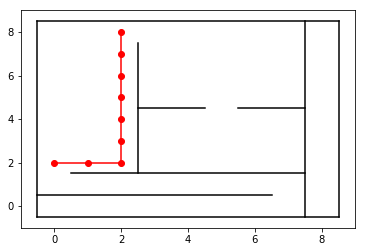

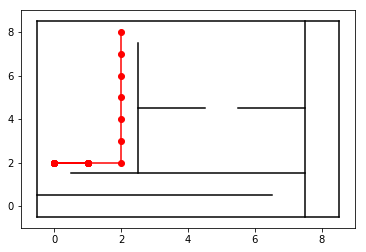

In [42]:
startState.x = 0
startState.y = 2
goalState.x = 2
goalState.y = 8
path = iterativeDeepeningSearch(startState, goalState, actionsF_grid, takeActionF_grid, 20)
draw(startState, goalState, path)
path = depthLimitedSearch(startState, goalState, actionsF_grid, takeActionF_grid, 20)
draw(startState, goalState, path)

### Through the opening (4, 6) to (4, 4)

Solution path: from (4, 6) to (4, 4) taking 5 moves 
(4, 6)
(5, 6)
(5, 5)
(5, 4)
(4, 4)
Solution path: from (4, 6) to (4, 4) taking 21 moves 
(4, 6)
(3, 6)
(4, 6)
(3, 6)
(4, 6)
(3, 6)
(4, 6)
(3, 6)
(4, 6)
(3, 6)
(4, 6)
(3, 6)
(4, 6)
(3, 6)
(4, 6)
(3, 6)
(4, 6)
(5, 6)
(5, 5)
(5, 4)
(4, 4)


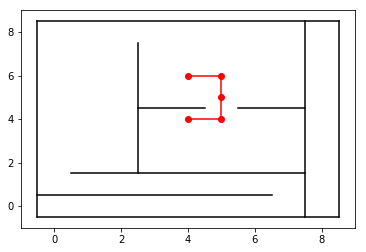

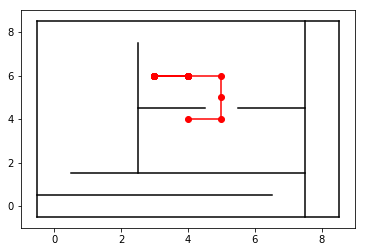

In [43]:
startState.x = 4
startState.y = 6
goalState.x = 4
goalState.y = 4
path = iterativeDeepeningSearch(startState, goalState, actionsF_grid, takeActionF_grid, 20)
draw(startState, goalState, path)
path = depthLimitedSearch(startState, goalState, actionsF_grid, takeActionF_grid, 20)
draw(startState, goalState, path)